# HW 2
## Tim Demetriades
### AAI 695 WS2 - Shucheng Yu
2/16/2022

#### Question 3

#### Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x.

#### 1. Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_data = np.genfromtxt('data2.txt', delimiter=',')

In [3]:
sorted_file_data = file_data[np.argsort(file_data[:, 0])]

In [4]:
x = sorted_file_data[:, 0]
y = sorted_file_data[:, 1]

Text(0.5, 1.0, 'Plotted Data')

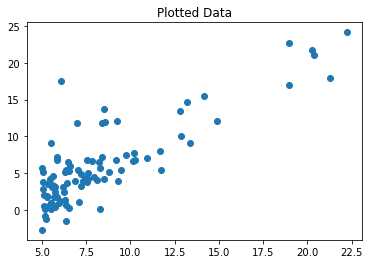

In [5]:
plt.scatter(x, y)
plt.title('Plotted Data')

#### Use python to implement the following methods to find the coefficients:
#### 2. Normal Equation

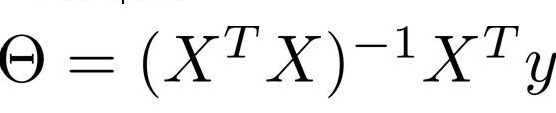

In [6]:
x_b = np.c_[np.ones((97, 1)), x]  # add x0 = 1 to each instance (for bias term)

In [7]:
theta_normal = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y    # normal equation

In [8]:
print(f'Best parameters from normal equation:\n {theta_normal}')

Best parameters from normal equation:
 [-3.89578088  1.19303364]


Let's make a prediction for points on either end of the data from the file to and then use those to plot the line of best fit the model created using the parameters found from the normal equation.

In [9]:
x_new = np.array([[5], [25]])  
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b @ theta_normal
y_predict

array([ 2.06938734, 25.93006023])

Text(0.5, 1.0, 'Normal Equation Prediction')

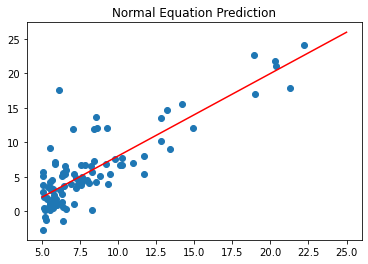

In [10]:
plt.plot(x_new, y_predict, "r-")
plt.scatter(x, y)
plt.title('Normal Equation Prediction')

#### 3. Gradient Descent

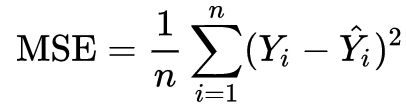

##### (a) Split dataset into 80% for training and 20% for testing.
##### (b) Plot MSE vs. iteration of each mode for both training set and testing set; compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.
##### (c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

**First** we will do **(b)**, creating 2 models - one that uses batch gradient descent and another that uses stochatic. They will have the same learning rate of 0.01 and use the same random initial values of theta.

Below the data is split into a training set (80%) and a test set (20%).

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = x.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

To help the gradient descent converge faster, we will scale the data using Standard Scaler. This essentially performs standardization by finding the mean and standard deviation of the training data and then using it to center and scale both the training and testing data.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Min-max scaler
scaler = StandardScaler()    
scaler.fit(x_train)    # only fit scaler on train data
x_train = scaler.transform(x_train)    # center data around 0
x_test = scaler.transform(x_test)

Text(0.5, 1.0, 'Scaled Data')

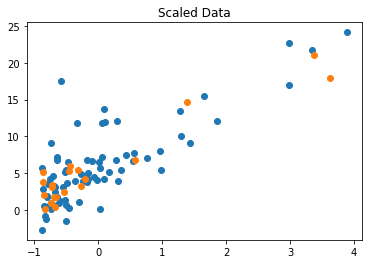

In [15]:
plt.scatter(x_train, y_train)    # blue dots are training data
plt.scatter(x_test, y_test)    # orange dots are test data
plt.title('Scaled Data')

Here a column of 1s is added for the bias.

In [16]:
x_train_b = np.c_[np.ones((len(x_train), 1)), x_train]  # add x0 = 1 to each instance
x_test_b = np.c_[np.ones((len(x_test), 1)), x_test]  # add x0 = 1 to each instance

Need to reshape target data.

In [17]:
y_train = y_train.reshape(-1, 1)    # make it 77x1
y_test = y_test.reshape(-1, 1)    # make it 77x1

Theta is randomly initialized.

In [18]:
random_theta = np.random.randn(2, 1) 
random_theta

array([[-0.56810067],
       [-0.81359359]])

Below is where batch gradient descent is performed. First, some initial parameters are set.

#### Batch Gradient Descent

In [19]:
# Batch Gradient Descent
learning_rate = 0.01
iterations = 300
num_of_samples_train = len(x_train)
num_of_samples_test = len(x_test)
mse_list_train = []
mse_list_test = []

Below is a function that performs batch gradient descent. It uses the training data to calculate the gradient to update theta. Then it uses the new theta to find the mse for both the training and test data. The mse values are accumulated in lists so they can be plotted after.

In [20]:
def batch_gradient_descent(learning_rate, theta, iterations, x_train, x_test, y_train, y_test):
    print('Conducting batch gradient descent...')
    theta = random_theta
    for iteration in range(iterations):
        # calculate gradient
        gradients_train = (2 / num_of_samples_train) * x_train.T @ (x_train @ theta - y_train)
        
        # update theta
        theta = theta - learning_rate * gradients_train
        
        # calculate mse (training data)
        mse_train = (1 / num_of_samples_train) * ((y_train - x_train @ theta).T @ (y_train - x_train @ theta))
        mse_list_train.append(float(mse_train))
        
        # calculate mse (test data)
        mse_test = (1 / num_of_samples_test) * ((y_test - x_test @ theta).T @ (y_test - x_test @ theta))
        mse_list_test.append(float(mse_test))
        
    print('Batch gradient descent complete.')
    return theta, mse_list_train, mse_list_test

Use the function to perform batch gradient descent.

In [21]:
theta, mse_list_train, mse_list_test = batch_gradient_descent(learning_rate, 
                                                              random_theta, 
                                                              iterations, 
                                                              x_train_b, 
                                                              x_test_b, 
                                                              y_train, 
                                                              y_test)

Conducting batch gradient descent...
Batch gradient descent complete.


In [22]:
print(f'Calculated parameters from batch gradient descent:\n {theta}')

Calculated parameters from batch gradient descent:
 [[5.91110979]
 [4.38020227]]


Here some predictions are made and then used to plot a line showing the linear model the algorithm created.

Text(0.5, 1.0, 'Scaled Data')

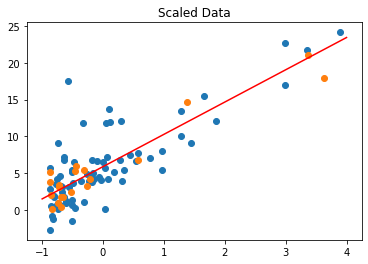

In [23]:
x_new = np.array([[-1], [4]])  
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b @ theta
y_predict

plt.plot(x_new, y_predict, "r-")
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.title('Scaled Data')

Below are plots for the MSE. The first plot is of the MSE vs Iterations for the training data, and the second is the same for the test data.

Text(0.5, 1.0, 'MSE vs Iteration - Training')

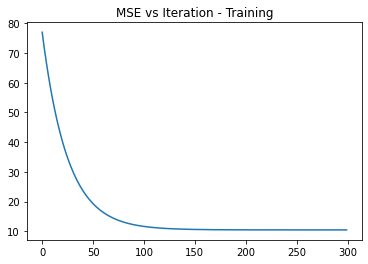

In [24]:
plt.plot(mse_list_train)
plt.title('MSE vs Iteration - Training')

Text(0.5, 1.0, 'MSE vs Iteration - Testing')

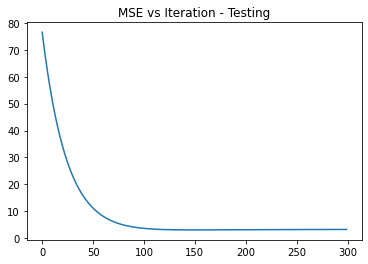

In [25]:
plt.plot(mse_list_test)
plt.title('MSE vs Iteration - Testing')

Below is where Stochastic Gradient Descent is performed. First, some initial parameters are set.

#### Stochastic Gradient Descent

In [26]:
epochs = 25
learning_rate = 0.01
num_samples_train = len(x_train)
num_samples_test = len(x_test)
mse_list_train = []
mse_list_test = []

Below is a function that performs stochastic gradient descent. Unlike with batch gradient descent where all the data is used for each epoch (iteration), here only one randomly selected sample is used to calculate the gradient and update theta. This repeats for the number of training samples (which would be one epoch) and then is repeated for the number of epochs. Then it uses the new theta to find the MSE for both the training and test data. The MSE values are accumulated in lists so they can be plotted after.

In [27]:
def stochastic_gradient_descent(learning_rate, theta, epochs, x_train, x_test, y_train, y_test):
    print('Conducting stochastic gradient descent...')
    theta = random_theta
    for epoch in range(epochs):
        mse_sum_train = 0
        
        # for each sample (since random some are repeated and some are skipped)
        for sample in range(num_samples_train):
            # select a random sample
            random_index = np.random.randint(num_samples_train)
            xi_train = x_train[random_index : random_index + 1]
            yi_train = y_train[random_index : random_index + 1]
            
            # caclculate gradient
            gradients = 2 * (xi_train.T @ (xi_train @ theta - yi_train))
            theta = theta - learning_rate * gradients

            # accumulate error sum for mse (training data)
            mse_sum_train += ((yi_train - (xi_train @ theta)) ** 2)

        # calculate mse (training data)
        mse_train = mse_sum_train / num_samples_train
        mse_list_train.append(float(mse_train))
        
        # calculate mse (test data)
        mse_test = (1 / num_of_samples_test) * ((y_test - x_test @ theta).T @ (y_test - x_test @ theta))
        mse_list_test.append(float(mse_test))
        
    print('Stochastic gradient descent complete.')
    return theta, mse_list_train, mse_list_test

Use the function to perform stochastic gradient descent.

In [28]:
theta, mse_list_train, mse_list_test = stochastic_gradient_descent(learning_rate, 
                                                                   random_theta, 
                                                                   epochs, 
                                                                   x_train_b, 
                                                                   x_test_b, 
                                                                   y_train, 
                                                                   y_test)

Conducting stochastic gradient descent...
Stochastic gradient descent complete.


In [29]:
print(f'Calculated parameters from stochastic gradient descent:\n {theta}')

Calculated parameters from stochastic gradient descent:
 [[5.76857228]
 [4.75562667]]


Here some predictions are made and then used to plot a line showing the linear model the algorithm created.

Text(0.5, 1.0, 'Scaled Data')

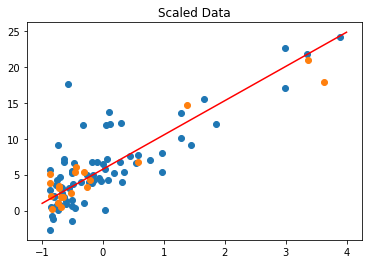

In [30]:
x_new = np.array([[-1], [4]])  
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b @ theta
y_predict

plt.plot(x_new, y_predict, "r-")
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.title('Scaled Data')

Below are plots for the MSE. The first plot is of the MSE vs Iterations for the training data, and the second is the same for the test data.

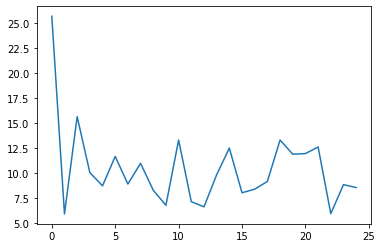

In [31]:
plt.plot(mse_list_train)

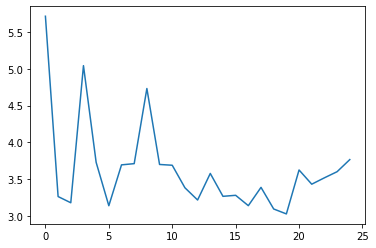

In [32]:
plt.plot(mse_list_test)

**Discussion on comparison of Batch vs Stochastic Gradient Descent**

With both batch and stochastic gradient descent the algorithms are able to find relatively similar optimal parameter values. We can see that the lines produced from the models do a pretty good job at fitting the data. 

As for the accuracy of the models, the batch gradient descent algorithm has a higher initial MSE, but is quickly able to minimize this error over the iterations, with only around 150 iterations needed to get a relatively low MSE. The training and test MSE plots are relatively similar for batch gradient descent. For stochastic, the test MSE seems to be a good amount lower, which could be attributed to the lower amount of test samples compared to training samples.

With stochastic gradient descent, the model actually starts with a lower initial MSE, since each sample is used to one by one update theta, with the MSE being calculated after each epoch, which is after 77 (the number of training samples) theta updates rather than one theta update with batch gradient descent. However, unlike with batch gradient descent, stochastic gradient descent will not find a an optimal minimum and instead bounce around a good minimum value (do to the random - stochastic - nature of the algorithm). This is why it is ideal to set a stopping condition, such as setting a threshold for the MSE that if passed stops the algorithm. This though, can also be beneficial as it can be used to avoid getting trapped in local minimums. Looking at our results, only a few epochs are needed to find relatively good values of theta.

As for the rate of convergence, stochastic gradient descent will converge faster than batch gradient descent since it does not use every sample per theta update. This is why stochastic gradient descent is generally better when there is a lot of data. However, in our case since we only have 97 total samples, batch gradient descent will work just fine.

Next we will do part **(c)**, where we will plot the MSE vs learning rate for both batch and stochastic gradient descent.

**Batch Gradient Descent**

In [33]:
learning_rate_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

In [34]:
mse_list_batch = []
mse_list_stochastic = []

In [35]:
for learning_rate in learning_rate_list:
    mse_list_train_batch = []
    
    _, mse_list_train_batch, _ = batch_gradient_descent(learning_rate, 
                                                  random_theta, 
                                                  iterations, 
                                                  x_train_b, 
                                                  x_test_b, 
                                                  y_train, 
                                                  y_test)
    
    mse_list_batch.append(mse_list_train_batch[-1])

Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.
Conducting batch gradient descent...
Batch gradient descent complete.


In [36]:
for learning_rate in learning_rate_list:
    mse_list_train_stochastic = []
    
    _, mse_list_train_stochastic, _ = stochastic_gradient_descent(learning_rate, 
                                                       random_theta, 
                                                       epochs, 
                                                       x_train_b, 
                                                       x_test_b, 
                                                       y_train, 
                                                       y_test)
    
    mse_list_stochastic.append(mse_list_train_stochastic[-1])

Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.
Conducting stochastic gradient descent...
Stochastic gradient descent complete.


In [37]:
mse_list_batch

[10.45758653539801,
 10.457209621632458,
 10.457209620035341,
 10.457209620035337,
 10.457209620035337,
 10.457209620035337,
 10.457209620035337,
 10.457209620035336,
 10.457209620035336,
 10.457209620035337]

In [38]:
mse_list_stochastic

[16.81399508167823,
 11.636263517746167,
 6.133565042028093,
 9.174691343109643,
 6.938031093829019,
 6.399086532836329,
 11.591488285183262,
 19.183349846959075,
 8.721692189442694,
 10.820994954632253]

Text(0, 0.5, 'MSE')

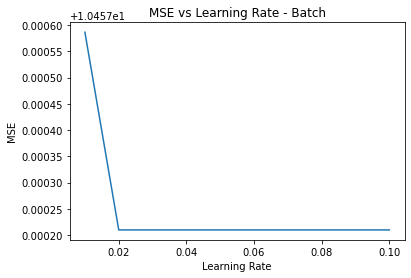

In [43]:
plt.plot(learning_rate_list, mse_list_batch)
plt.title('MSE vs Learning Rate - Batch')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

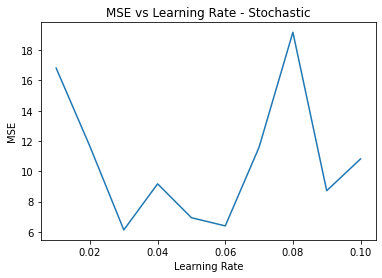

In [44]:
plt.plot(learning_rate_list, mse_list_stochastic)
plt.title('MSE vs Learning Rate - Stochastic')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')

Above you can see our results plotting the training data MSE vs different learning rates for both batch and stochastic gradient descent. With batch gradient descent, it seems that adjusting the learning rate between 0.01 and 0.1 does not drastically change the value of MSE, with the MSE values between learning rates of 0.02 to 0.1 all being approximately the same values and even the MSE for a learning rate of 0.01 being only slightly greater.

However, with stochastic gradient descent this is a different story. The best learning rates seem to be 0.3 and 0.6, as these give the lowest MSE values, whereas 0.8 gives the highest.

This is why it is important to adjust the hyperparameters of your model to find what gives the best results. In our case, using a learning rate of 0.03 would give us a model with the lowest MSE.

**For batch gradient descent, the best learning rate seems to be around 0.02, whereas for stochastic gradient descent the best learning rate seems to be about 0.03.**